# 오즈 (Odds)
- 실패 확률에 대한 성공 확률의 비
    - 오즈(Odds)가 3이라면 성공 확률이 실패 확률의 3배라는 의미

In [1]:
# A가 1번 이기고 6번 질 경우
1/6

0.16666666666666666

In [2]:
# A가 6번 이기고 1번 질 경우
6/1

6.0

# 로짓 변환 
- 로짓 : 오즈에 로그를 씌운 값
- 로짓 변환 :  오즈에 로그를 씌어 변환하는 과정
- 오즈의 경우 대칭이 아니기 때문에 Log 변환을 통해 대칭을 만들어줌
- 아래 값들을 보면 1/6이나 6/1이나 같은 값이 되므로 대칭이 됨을 볼 수 있음

In [3]:
import numpy as np
np.log(1/6)

-1.791759469228055

In [4]:
np.log(6/1)

1.791759469228055

# 로지스틱 회귀 
- 선형 회귀 분석과 달리 예측하고자 하는 레이블이 범주형인 경우 사용되는 모델

- 로지스틱 회귀 모델은 선형 회귀 모델 기반으로 확률 모델로 접근

- 예측하고자 하는 레이블의 값이 확률인것 이외에는 단순 선형 회귀 모델의 일반적인 형태와 동일
    - 레이블의 값이 확률(0에서 1사이)값을 가지게 하기 위해 기존 회귀 식에 승산과 로그를 취함
        - 기존 회귀 모형의 수 범위가 일치하지 않기 때문에 승산과 로그를 적용 (Y는 0 ~ 1, WX+b는 (-inf)~inf기 때문)

- 함수의 결과 값이 0에서 1사이의 값을 반환하는 함수를 로지스틱 함수라고 함
    - 시그모이드(Sigmoid)함수도 대표적인 로지스틱 함수

- 로지스틱 회귀 모델은 이항 분류를 기본으로 함
    - 다항 분류의 경우 모델을 여러 개를 사용

# 로지스틱 회귀 실습

In [5]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression

In [6]:
# 분류 데이터 가져오기
df = pd.read_csv('/mnt/elice/dataset/breast_cancer.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
# 컬럼별 데이터 개수 및 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

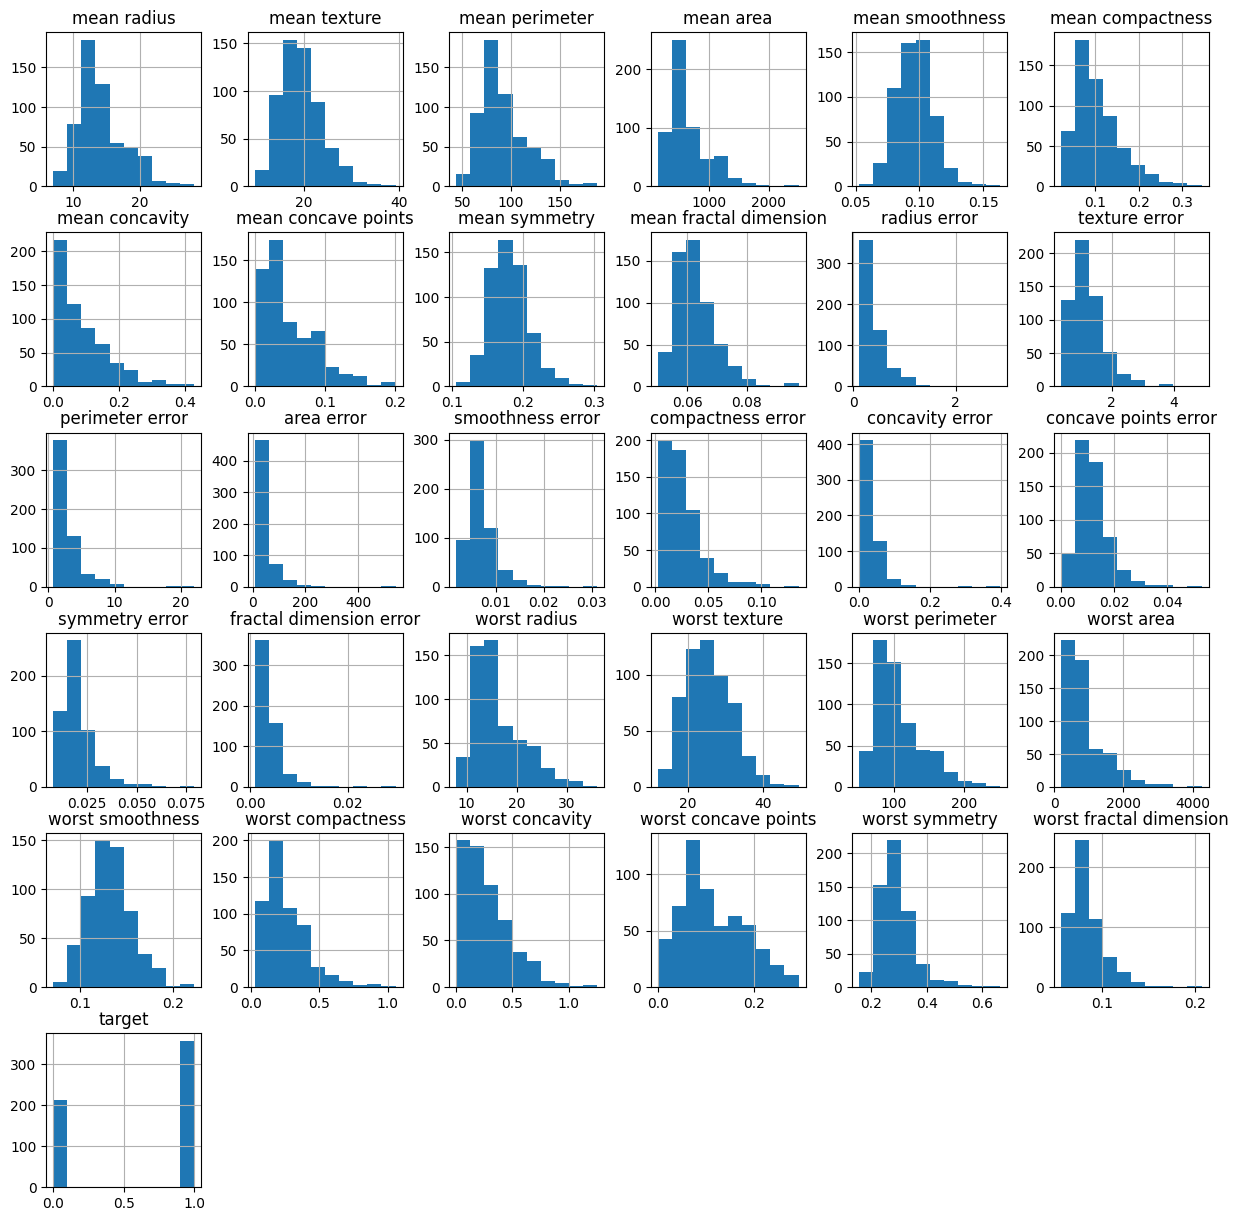

In [9]:
# 컬럼별 분포 확인
df.hist(figsize=(15, 15))
plt.show()

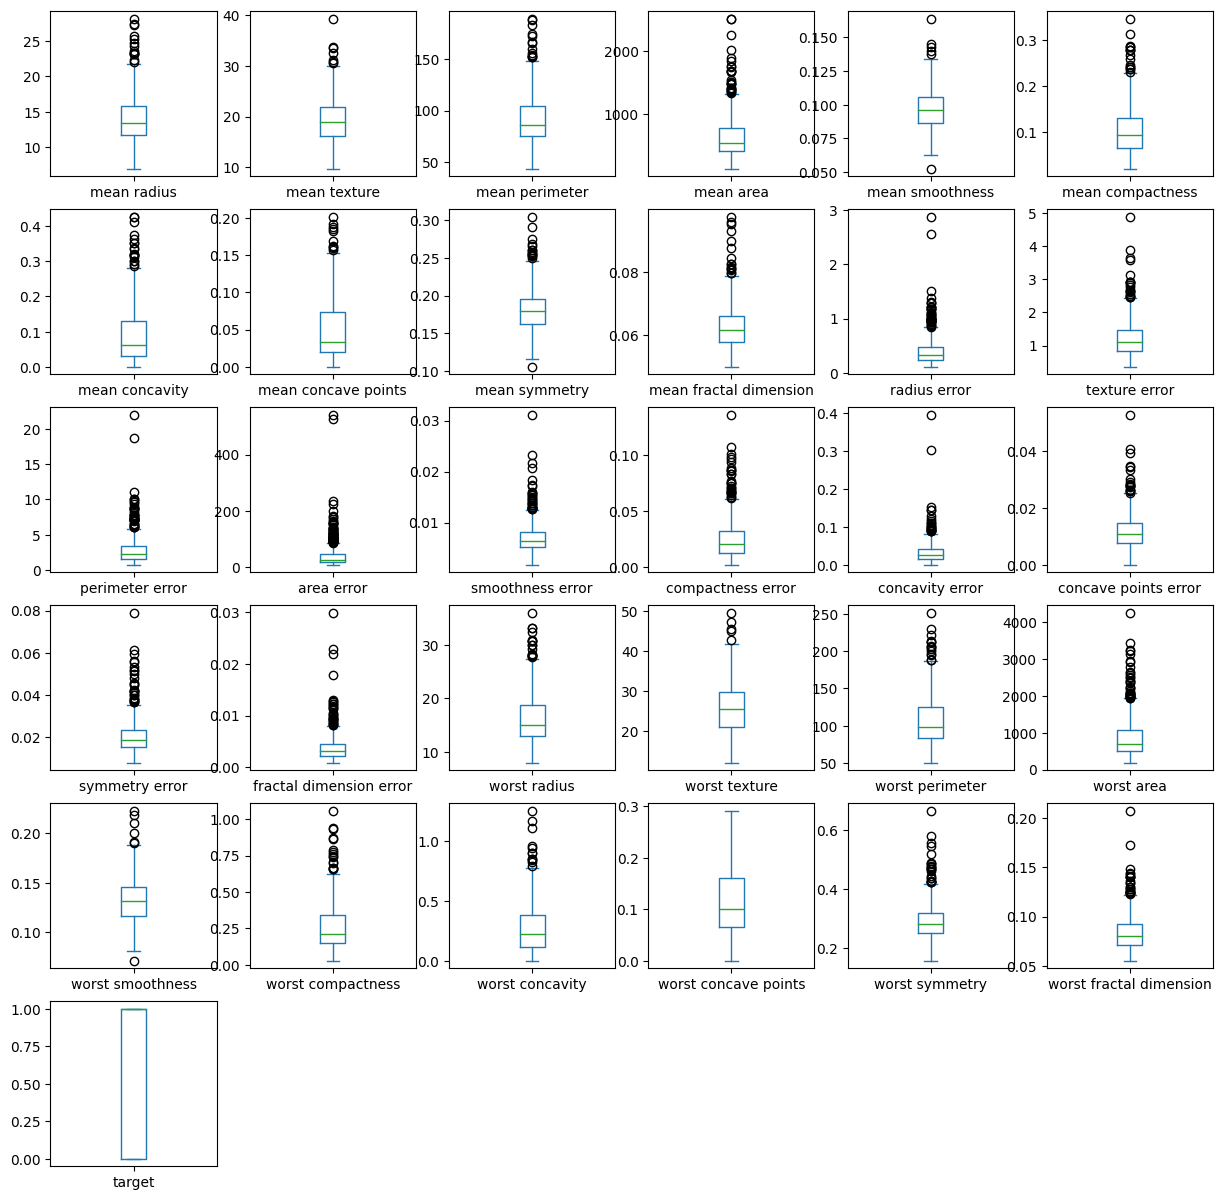

In [10]:
# 컬럼별 이상치 확인
df.plot(kind='box', figsize=(15, 15), subplots=True, layout=(6, 6))
plt.show()

In [11]:
# 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
Y # 범주형 > 분류 모델 사용

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [13]:
# 범주 비율 확인
pd.value_counts(Y, normalize=True)

# 범주 비율이 불균형하다면 층화추출이나 정확도 대신 precision, recall 등의 지표를 사용할 수도 있음

1    0.627417
0    0.372583
Name: target, dtype: float64

In [14]:
# 학습용과 평가용으로 데이터 분할
 # 층화 분리 적용 (층화추출 - Y가 범주형에서만 사용 가능)
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=0)

In [15]:
# 분리 결과 확인
pd.value_counts(y_train, normalize=True)

1    0.626761
0    0.373239
Name: target, dtype: float64

In [16]:
# 분리 결과 확인
pd.value_counts(y_test, normalize=True)

1    0.629371
0    0.370629
Name: target, dtype: float64

In [17]:
# 모델 생성
model = LogisticRegression() 

In [18]:
# 모델 학습
model.fit(x_train, y_train) # 학습용 데이터만 사용

/home/elicer/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# 모델 평가 (정확도 - 분류 모델이기 때문에 정확도를 사용)
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.9577464788732394
평가 데이터 성능 : 0.9230769230769231


In [20]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [21]:
# classification_report 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        53
           1       0.93      0.94      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



In [22]:
# 최대 반복 횟수 증가
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.9671361502347418
평가 데이터 성능 : 0.9370629370629371


In [23]:
# 모델 계수 조회 (컬럼 별 계수)
pd.Series(model.coef_[0], index=x_train.columns).sort_values()

worst concavity           -1.184607
worst compactness         -0.663165
worst concave points      -0.484763
worst texture             -0.471090
mean concavity            -0.444899
worst symmetry            -0.408841
mean perimeter            -0.326657
worst smoothness          -0.249476
mean concave points       -0.230147
mean compactness          -0.205737
worst perimeter           -0.173429
mean symmetry             -0.167331
worst radius              -0.155638
area error                -0.139723
radius error              -0.136413
mean smoothness           -0.117754
worst fractal dimension   -0.093633
concavity error           -0.079846
concave points error      -0.033086
mean fractal dimension    -0.028909
symmetry error            -0.020596
smoothness error          -0.016853
worst area                -0.007458
compactness error         -0.002534
fractal dimension error    0.000049
mean area                  0.027981
mean texture               0.210347
texture error              0

In [24]:
# 모델 계수 형태 조회 (이진 분류라서 하나의 모델, 30개의 특성)
model.coef_.shape

(1, 30)

In [25]:
# 분류 데이터 가져오기 (다항 분류)
df = pd.read_csv('/mnt/elice/dataset/digits.csv') # 손글씨 데이터셋
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


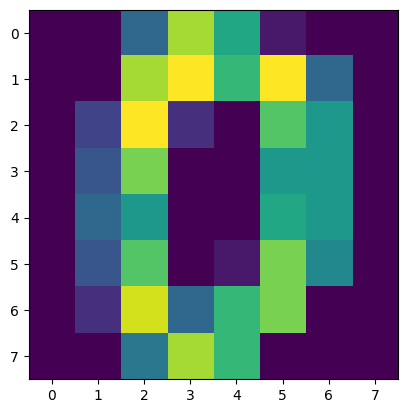

In [26]:
# 데이터 시각화
plt.imshow(df.iloc[0, :-1].values.reshape(8, 8))

In [27]:
# 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [28]:
Y # 범주형 > 분류 모델 사용

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [29]:
# 범주 비율 확인
pd.value_counts(Y, normalize=True)

3    0.101836
1    0.101280
5    0.101280
4    0.100723
6    0.100723
9    0.100167
7    0.099610
0    0.099054
2    0.098497
8    0.096828
Name: target, dtype: float64

In [30]:
# 학습용과 평가용으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [31]:
# 모델 생성
model = LogisticRegression() 

In [32]:
# 모델 학습
model.fit(x_train, y_train) # 학습용 데이터만 사용

/home/elicer/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# 모델 평가 (정확도)
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 1.0
평가 데이터 성능 : 0.9511111111111111


In [34]:
# 모델 계수 형태 조회 (모델 10개 사용!)
model.coef_.shape

(10, 64)

In [35]:
# 모델 계수 조회 (첫번째 범주 - 첫번째 모델의 계수들 조회)
pd.Series(model.coef_[0], index=x_train.columns).sort_values()

pixel_3_4   -0.473123
pixel_4_4   -0.346046
pixel_2_4   -0.322142
pixel_5_4   -0.173355
pixel_3_3   -0.151033
               ...   
pixel_1_3    0.151311
pixel_6_4    0.161020
pixel_7_3    0.165218
pixel_2_5    0.193751
pixel_5_2    0.224948
Length: 64, dtype: float64

## 제출

제출을 위해 새로 불러온 `breast_cancer.csv` 데이터를 통해 Logistic Regression 모델을 만들고 학습한 이후 학습 데이터의 score와 테스트 데이터의 score를 아래와 같은 dictionary로 만들어 `result`에 저장하세요.
- `{"train": 0.123, "test": 0.456}`
- Logistic Regression 모델의 `max_iter` 값은 10000으로 설정합니다.
- Logistic Regression 모델을 생성할 때 반드시 `random_state=SEED`를 추가해야 합니다. 이를 추가하지 않으면 제대로 채점되지 않습니다.

In [36]:
df = pd.read_csv('/mnt/elice/dataset/breast_cancer.csv')
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

# SEED 값 바꾸면 제대로 채점되지 않을 수 있습니다.
SEED = 2023

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=SEED)

# TODO: Logistic Regression 모델을 학습하세요.
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

result = {
    "train": model.score(x_train, y_train),
    "test": model.score(x_test, y_test),
}

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [37]:
import os
import json

assert isinstance(result, dict), \
    "'result' 변수에 요구사항에 맞는 dictionary가 저장되어 있는지 확인하세요."

with open('result.json', 'w') as f:
    json.dump(result, f)

os.system('elice_grade result.json cds_ai_exercise.ipynb')

send files ['result.json', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 3.367 seconds
=== Message ===
제출 완료되었습니다.


0